# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time


In [34]:
treino = pd.read_csv('./output/X_train.csv')
teste = pd.read_csv('./output/X_test.csv')
frames = [treino, teste]
base = pd.concat(frames)
base.head(1)

,Unnamed: 0,subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [35]:
y = base['subject']
X = base
X.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [36]:
id_random = 846846#int(input('Informe o valor do random_state: '))

X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2861, random_state=id_random)
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=id_random//5)

In [37]:
tot_base=len(X_)+len(X_test)
print('Conferência das bases:')
print(f'Base teste....: {len(X_test)} linhas = {round((len(X_test) /tot_base*100),2)}%')
print(f'Base treino...: {len(X_train)} linhas = {round((len(X_train) /tot_base*100),2)}%')
print(f'Base validação: {len(X_valid)} linhas = {round((len(X_valid) /tot_base*100),2)}%')
print(f'Total.........:{tot_base}')

Conferência das bases:
Base teste....: 2947 linhas = 28.61%
Base treino...: 5514 linhas = 53.54%
Base validação: 1838 linhas = 17.85%
Total.........:10299


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [38]:
%%time
caminho = DecisionTreeClassifier(random_state=id_random, max_depth=4).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

positivos = [num for num in list(ccp_alphas) if num >= 0] 
pos_count = len(positivos) 
  
print("ccp_alphas positivos: ", pos_count) 
print("ccp_alphas negativos ", len(list(ccp_alphas)) - pos_count) 

ccp_alphas positivos:  14
ccp_alphas negativos  0
Wall time: 1.49 s


In [39]:
start_time = time.time()

clf = DecisionTreeClassifier(random_state=id_random, max_depth=4).fit(X_train, y_train)
feature_importances = clf.feature_importances_
elapsed_time = time.time() - start_time

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]


variaveis_importantes = pd.DataFrame(index=sorted_feature_names)
variaveis_importantes['sorted_indices'] = sorted_indices
variaveis_importantes['sorted_importances'] = sorted_importances
best_var=variaveis_importantes.sort_values(by='sorted_importances',ascending=False)
print(f'MELHORES VARIÁVEIS ENCONTRADAS \n{best_var[0:3].index.tolist()}')
print(f"\nTempo gasto para computar a importância das variáveis: {elapsed_time:.0f} segundos")

MELHORES VARIÁVEIS ENCONTRADAS 
['tGravityAcc-max()-Y', 'fBodyGyro-bandsEnergy()-1,8_475', 'tGravityAcc-max()-Z']

Tempo gasto para computar a importância das variáveis: 2 segundos


In [40]:
start_time = time.time()

feature_names = list(X_train.columns)
forest = RandomForestClassifier(random_state=id_random,max_depth=4).fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
elapsed_time = time.time() - start_time

best_forest_importances = forest_importances.sort_values(ascending=False).iloc[0:3]
std2=list(best_forest_importances)

print(f'MELHORES VARIÁVEIS ENCONTRADAS \n{best_forest_importances.iloc[0:3].index.tolist()}')
print(f"\nTempo gasto para computar a importância das variáveis: {elapsed_time:.0f} segundos")

MELHORES VARIÁVEIS ENCONTRADAS 
['tGravityAcc-mean()-Z', 'tGravityAcc-max()-Z', 'angle(Z,gravityMean)']

Tempo gasto para computar a importância das variáveis: 4 segundos


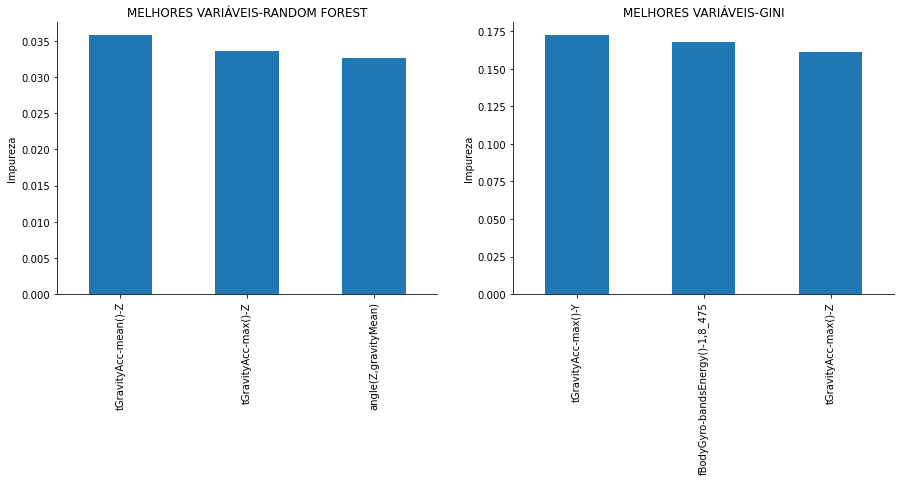

In [41]:
plt.close('all')
plt.rc('figure', figsize=(15, 5))
fig, axes = plt.subplots(1, 2)

best_forest_importances.plot.bar(ax=axes[0])
axes[0].set_title("MELHORES VARIÁVEIS-RANDOM FOREST")
axes[0].set_ylabel("Impureza")
best_var['sorted_importances'][0:3].plot.bar(ax=axes[1])
axes[1].set_title("MELHORES VARIÁVEIS-GINI")
axes[1].set_ylabel("Impureza")

# fig.tight_layout()

# sns.barplot(x='posse_de_imovel',y='renda',data=df, ax=axes[0,0])
# sns.barplot(x='posse_de_veiculo',y='renda',data=df, ax=axes[0,1])
sns.despine()


In [42]:
best_forest=forest_importances.sort_values(ascending=False).iloc[0:3].index.tolist()
best_gini=best_var['sorted_importances'][0:3].index.tolist()
print(f'Random Forest {best_forest}')
print(f'Gini          {best_gini}')

Random Forest ['tGravityAcc-mean()-Z', 'tGravityAcc-max()-Z', 'angle(Z,gravityMean)']
Gini          ['tGravityAcc-max()-Y', 'fBodyGyro-bandsEnergy()-1,8_475', 'tGravityAcc-max()-Z']


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [43]:
%%time
melhor_variavel = int(input('Informe (1) para Random Forest ou (2) Gini:'))
if melhor_variavel == 1:
    var=best_forest
    text='Random Forest'
elif melhor_variavel == 2:
    var=best_gini
    text='Gini'
else:
    print('Opção incorreta')    

x_train = X_train[var]
x_test = X_test[var]
x_valid = X_valid[var]

caminho = DecisionTreeClassifier(random_state=id_random,max_depth = 4).cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
print(f'Variáveis {text}: {var}')
print(f'ccp_alphas gerados: {ccp_alphas.size}')

Informe (1) para Random Forest ou (2) Gini: 2


Variáveis Gini: ['tGravityAcc-max()-Y', 'fBodyGyro-bandsEnergy()-1,8_475', 'tGravityAcc-max()-Z']
ccp_alphas gerados: 16
Wall time: 4.37 s


In [44]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=id_random, ccp_alpha=ccp_alpha).fit(x_train, y_train)
    clfs.append(clf)

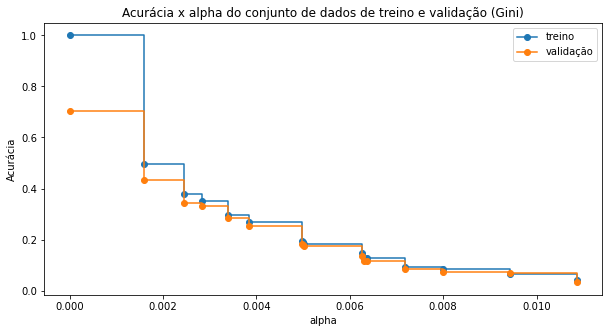

In [45]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
valid_scores = [clf.score(x_valid, y_valid) for clf in clfs]
plt.close('all')
plt.rc('figure', figsize=(10, 5))


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title(f'Acurácia x alpha do conjunto de dados de treino e validação ({text})')
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [46]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 70.46


DecisionTreeClassifier(random_state=846846)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

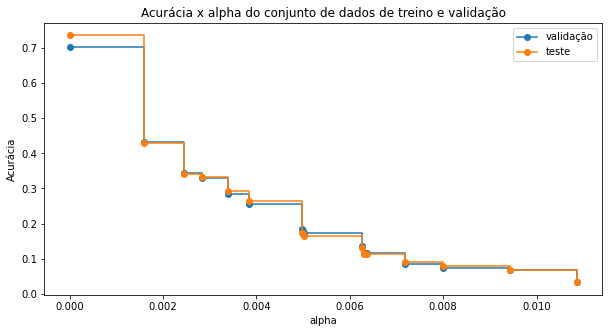

In [47]:
valid_scores = [clf.score(x_valid, y_valid) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

Acurácia: 73.63



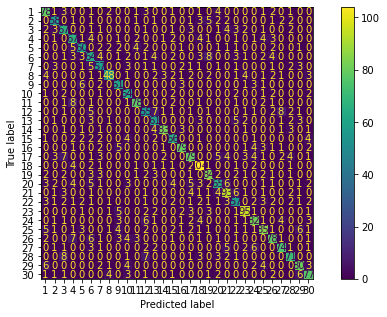

In [48]:
acuracia_teste = melhor_arvore.score(x_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}\n')
plot_confusion_matrix(melhor_arvore, x_test, y_test);